In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


FILE_PATH = './rec-crime-pfa-1990-2002.ods'

warnings.filterwarnings('ignore') # To suppress some Seaborn versioning warnings 

In [57]:
data = pd.read_excel(FILE_PATH,engine="odf",header=5)
data = data[data.Force.notna()]

data.head(5)

,Year,Force,Homicide,Attempted murder,Child destruction,Causing death by dangerous or careless driving,Causing death by dangerous or careless driving (inc under influence),Causing death by dangerous or careless driving (inc under influence).1,Causing death by dangerous or careless driving (inc under influence).2,Causing death by careless or inconsiderate driving,...,Protection from eviction,Adulteration of food,Other knives offences,Public health offences,Planning laws,"Disclosure, obstruction, false or misleading statements etc",Other indictable or triable either way offences,Dangerous driving,TOTAL OTHER MISCELLANEOUS OFFENCES,TOTAL ALL OFFENCES
2,1990,Avon and Somerset,10.0,19.0,0.0,7,..,..,..,..,...,..,..,..,..,..,..,0.0,..,442.0,127052.0
3,1990,Bedfordshire,6.0,10.0,0.0,5,..,..,..,..,...,..,..,..,..,..,..,7.0,..,222.0,53701.0
4,1990,Cambridgeshire,6.0,8.0,0.0,9,..,..,..,..,...,..,..,..,..,..,..,1.0,..,174.0,44565.0
5,1990,Cheshire,6.0,2.0,0.0,15,..,..,..,..,...,..,..,..,..,..,..,3.0,..,555.0,55462.0
6,1990,Cleveland,10.0,5.0,0.0,1,..,..,..,..,...,..,..,..,..,..,..,1.0,..,217.0,73878.0


In [58]:
print(data.shape)
data.Year.unique()

(528, 197)


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, '1998/99',
       '1999/00', '2000/01', '2001/02'], dtype=object)

There are 196 columns (crimes) so we will will only look at a subset of these - ```Homicide``` and ```Attempted murder```. 

First, we note some ```Year``` entries run over two years (e.g. maybe a business year 1998/99). We make a quick function to fix this to the (presumed) larger data epoch.

Then we filter to the crimes we are interested in and call this dataframe ```m_df```.

In [59]:
def year_fix(year)->str:
  '''
  Handles years that run over two calendar years by treating
  them as the earlier year, eg. 1998/98 --> 1998.
  '''
  if type(year)==str:
    if '/' in year:
      return year[:4]
    else:
      return year
  else:
    return str(year)

m_df = data.copy().filter(['Force','Year','Homicide','Attempted murder'])
m_df.Year = m_df.Year.map(year_fix)

print(m_df.Year.unique())
print('_'*30)
print(m_df.info())
print('_'*30)
m_df.tail()

['1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001']
______________________________
<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 2 to 551
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Force             528 non-null    object 
 1   Year              528 non-null    object 
 2   Homicide          528 non-null    float64
 3   Attempted murder  528 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.6+ KB
None
______________________________


,Force,Year,Homicide,Attempted murder
547,West Mercia,2001,9.0,22.0
548,West Midlands,2001,56.0,57.0
549,West Yorkshire,2001,42.0,47.0
550,Wiltshire,2001,3.0,8.0
551,Total,2001,891.0,856.0


Normalising the data to the earliest year (and where this is ```0```, replace it with the minimal crime value ```1```).

In [60]:
def norm(x):
  if x.iloc[0] == 0:
    return x/1
  else:
    return x/x.iloc[0]

m_df['h_norm'] = m_df.groupby('Force')['Homicide'].transform(norm)
m_df['am_norm'] = m_df.groupby('Force')['Attempted murder'].transform(norm)

m_df['h_pc'] = m_df['Homicide'].pct_change()*100
m_df['am_pc'] = m_df['Attempted murder'].pct_change()*100
# % changes, in case these might be useful

m_df.groupby(['Force','Year']).sum()

Homicide  Attempted murder    h_norm   am_norm  \
Force             Year                                                   
Avon and Somerset 1990      10.0              19.0  1.000000  1.000000   
                  1991      15.0               9.0  1.500000  0.473684   
                  1992      11.0               9.0  1.100000  0.473684   
                  1993      19.0              33.0  1.900000  1.736842   
                  1994      15.0              29.0  1.500000  1.526316   
...                          ...               ...       ...       ...   
Wiltshire         1997       8.0               2.0  0.727273  1.000000   
                  1998       2.0               6.0  0.181818  3.000000   
                  1999       4.0               6.0  0.363636  3.000000   
                  2000       9.0               4.0  0.818182  2.000000   
                  2001       3.0               8.0  0.272727  4.000000   

                             h_pc      am_pc  
Force             Year                        
Avon and Somerset 1990   0.000000   0.000000  
                  1991 -97.757848 -98.109244  
                  1992 -98.482759 -98.378378  
                  1993 -97.234352 -94.190141  
                  1994 -97.761194 -95.612708  
...                           ...        ...  
Wiltshire         1997 -77.142857 -88.888889  
                  1998 -95.121951 -72.727273  
                  1999 -84.000000 -62.500000  
                  2000 -75.675676 -86.206897  
                  2001 -92.857143 -82.978723  

[528 rows x 6 columns]

In order to plot both sets of normalised data together, the dataframe is grouped and then re-indexed. 

As an aside, not that the City of London ```Force``` has so few data it might be meaningless to draw conclusions.

In [61]:
df = m_df.copy().groupby(['Force','Year']).sum().reset_index()

df[df.Force=='London, City of']

,Force,Year,Homicide,Attempted murder,h_norm,am_norm,h_pc,am_pc
264,"London, City of",1990,0.0,0.0,0.0,0.0,-100.000000,-100.000000
265,"London, City of",1991,0.0,0.0,0.0,0.0,-100.000000,-100.000000
266,"London, City of",1992,3.0,0.0,3.0,0.0,0.000000,-100.000000
267,"London, City of",1993,1.0,2.0,1.0,2.0,-50.000000,-71.428571
268,"London, City of",1994,0.0,0.0,0.0,0.0,-100.000000,-100.000000
269,"London, City of",1995,1.0,1.0,1.0,1.0,-80.000000,-66.666667
270,"London, City of",1996,0.0,1.0,0.0,1.0,-100.000000,-75.000000
271,"London, City of",1997,2.0,0.0,2.0,0.0,-33.333333,-100.000000
272,"London, City of",1998,0.0,1.0,0.0,1.0,-100.000000,-50.000000
273,"London, City of",1999,0.0,1.0,0.0,1.0,-100.000000,-85.714286


Whereas with the countrywide ```Total```, there is a lot of data but no regional interpretation available.

In [62]:
df[df.Force=='Total']

,Force,Year,Homicide,Attempted murder,h_norm,am_norm,h_pc,am_pc
456,Total,1990,669.0,476.0,1.000000,1.000000,5981.818182,23700.000000
457,Total,1991,725.0,555.0,1.083707,1.165966,18025.000000,27650.000000
458,Total,1992,687.0,568.0,1.026906,1.193277,9714.285714,6211.111111
459,Total,1993,670.0,661.0,1.001495,1.388655,13300.000000,16425.000000
460,Total,1994,724.0,651.0,1.082212,1.367647,11966.666667,9200.000000
461,Total,1995,745.0,634.0,1.113602,1.331933,9212.500000,10466.666667
462,Total,1996,681.0,674.0,1.017937,1.415966,16925.000000,33600.000000
463,Total,1997,739.0,652.0,1.104634,1.369748,9137.500000,32500.000000
464,Total,1998,750.0,676.0,1.121076,1.420168,37400.000000,11166.666667
465,Total,1999,766.0,750.0,1.144993,1.575630,19050.000000,12400.000000


To continue our plot, we melt the dataframe in order to have the two crimes types appearing under a different column. Then we can use `Seaborn`'s FacetGrid.

In [63]:
df_melt = pd.melt(df, id_vars=['Force', 'Year'], value_vars=['h_norm', 'am_norm'],var_name='crime', value_name='value')
df_melt.sample(8)

,Force,Year,crime,value
815,Merseyside,2001,am_norm,11.400000
127,Dyfed-Powys,1997,h_norm,0.444444
32,Cambridgeshire,1998,h_norm,1.000000
833,Norfolk,1995,am_norm,0.625000
626,Dorset,1992,am_norm,0.555556
681,Gloucestershire,1999,am_norm,1.000000
5,Avon and Somerset,1995,h_norm,1.500000
34,Cambridgeshire,2000,h_norm,0.666667


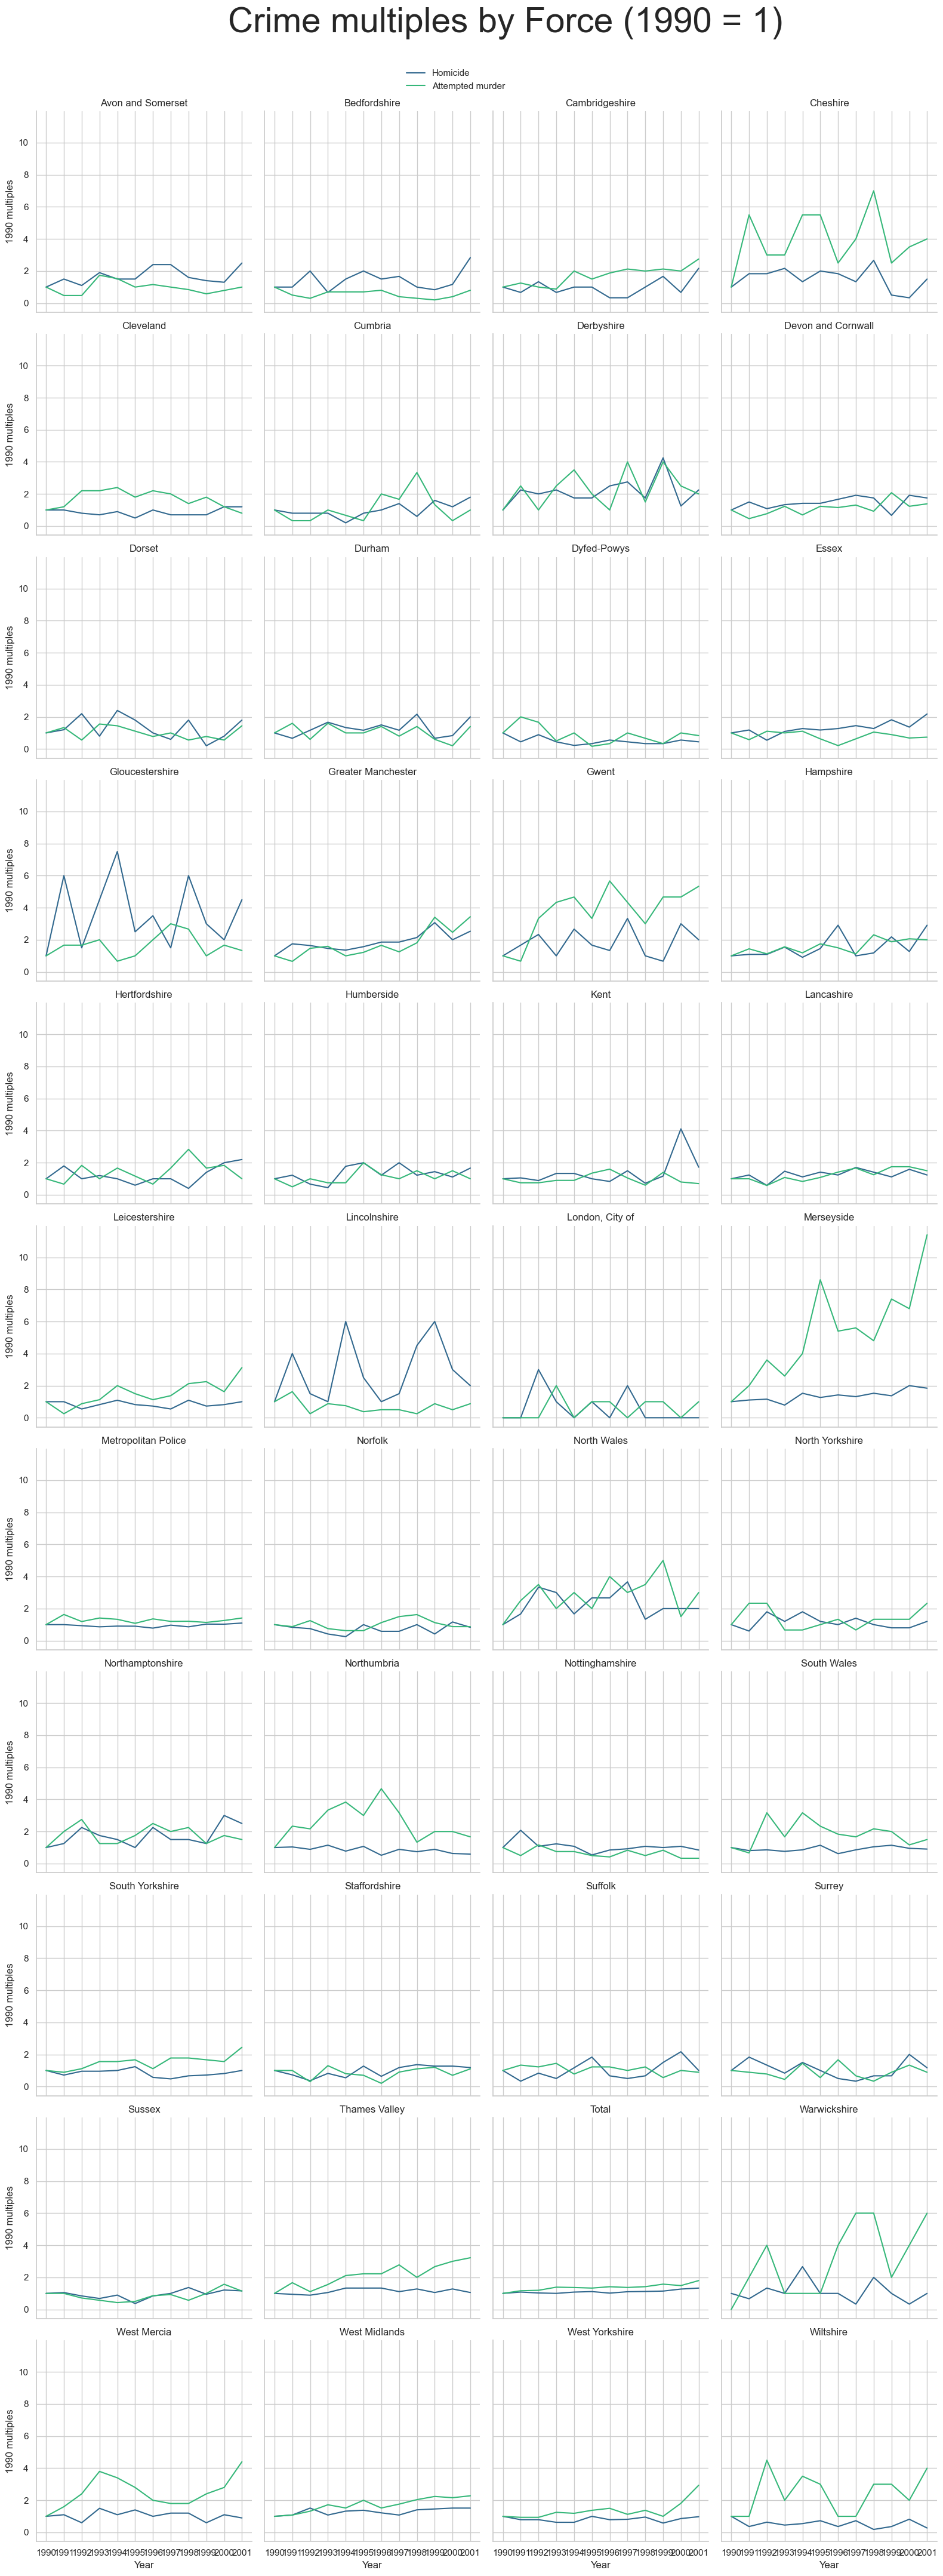

In [64]:
# 'FacetGrid'
g = sns.FacetGrid(df_melt, col="Force", hue='crime', col_wrap=4, height=4, palette='viridis')
g.map(sns.lineplot, 'Year', 'value')


g.add_legend()
g._legend.set_bbox_to_anchor((0.5, .95))
g._legend.set_title('')
for t, l in zip(g._legend.texts, ["Homicide", "Attempted murder"]):  
    t.set_text(l)

g.set_axis_labels('Year', '1990 multiples')
g.set_titles('{col_name}')

g.figure.subplots_adjust(top=0.94)
g.figure.suptitle('Crime multiples by Force (1990 = 1)', fontsize=42)

plt.show()

Gloucestershire, Lincolnshire have some significant variations and high increases in ```Homicide``` over the 12 year period.

With ```Attempted murders```, Merseyside stands out as with its 10-fold increase over the period.

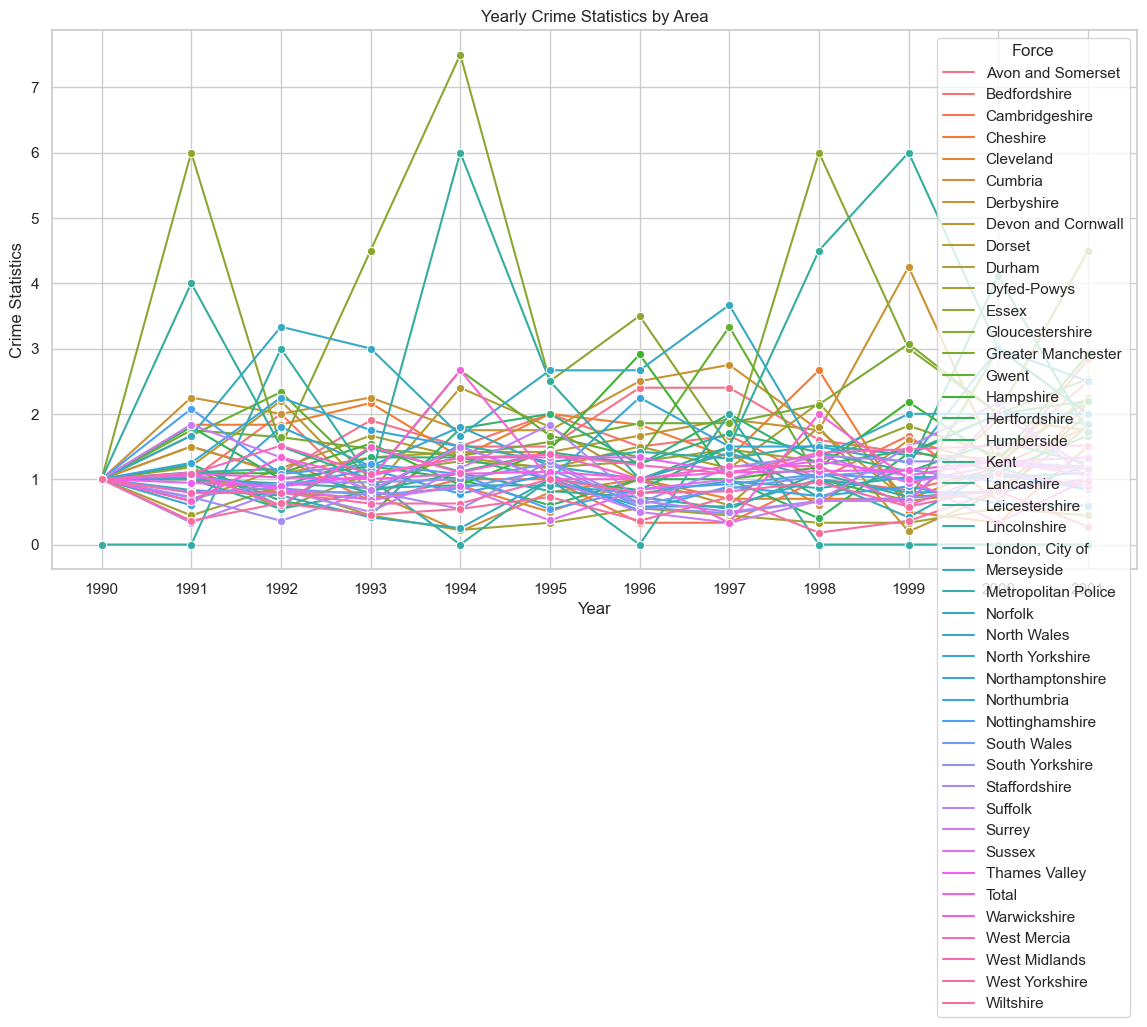

In [65]:
# Another plot that may be useful but is pretty ugly

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='h_norm', hue='Force', data=df, marker='o')
plt.title('Yearly Crime Statistics by Area')
plt.xlabel('Year')
plt.ylabel('Crime Statistics')
plt.legend(title='Force')
plt.show()


A quick look at ```Homicide```-```Attempted murder``` correlations: do they fluctuate/rise/fall together? Naïve null hypothesis is that they would move together.

In [66]:
# Create a new data frame with the Forces' homicide-attempted murder correlations

corrs={}
for i in df.Force.unique():
  corrs[i] = df[df.Force==i][['Homicide','Attempted murder']].corr().iloc[0,1]


h_am_corr = pd.DataFrame(columns=['Force','Corr'],data=corrs.items())

h_am_corr.describe()


,Corr
count,44.000000
mean,0.184574
std,0.342369
min,-0.541250
25%,-0.095394
50%,0.203795
75%,0.407071
max,0.854112


In most police ```Force``` jurisdictions, there is a small or anti-correlation between ```homicide```s and ```Attempted murder```s.

In [67]:
h_am_corr.sort_values(by='Corr',ascending=False).head(10)

,Force,Corr
13,Greater Manchester,0.854112
38,Total,0.763145
23,Merseyside,0.682995
41,West Midlands,0.661518
19,Lancashire,0.642783
6,Derbyshire,0.561524
9,Durham,0.535947
3,Cheshire,0.525059
36,Sussex,0.513896
33,Staffordshire,0.512461


## KMeans clustering

This machine learning algorithm finds patterns in the data and groups them into clusters with similar trends.

First the data needs to be pivoted so that each 'crime-year' becomes a unique feature of the ```Force```.

In [68]:
from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler 

# Pivots data so that each 'crime-year' becomes a feature
df_pivot = df.pivot_table(index='Force', columns='Year', values=['h_norm','am_norm'], fill_value=0)
df_pivot


am_norm                                                    \
Year                   1990      1991      1992      1993      1994      1995   
Force                                                                           
Avon and Somerset       1.0  0.473684  0.473684  1.736842  1.526316  1.000000   
Bedfordshire            1.0  0.500000  0.300000  0.700000  0.700000  0.700000   
Cambridgeshire          1.0  1.250000  1.000000  0.875000  2.000000  1.500000   
Cheshire                1.0  5.500000  3.000000  3.000000  5.500000  5.500000   
Cleveland               1.0  1.200000  2.200000  2.200000  2.400000  1.800000   
Cumbria                 1.0  0.333333  0.333333  1.000000  0.666667  0.333333   
Derbyshire              1.0  2.500000  1.000000  2.500000  3.500000  2.000000   
Devon and Cornwall      1.0  0.461538  0.769231  1.230769  0.692308  1.230769   
Dorset                  1.0  1.333333  0.555556  1.555556  1.444444  1.111111   
Durham                  1.0  1.600000  0.600000  1.600000  1.000000  1.000000   
Dyfed-Powys             1.0  2.000000  1.666667  0.500000  1.000000  0.166667   
Essex                   1.0  0.578947  1.105263  1.000000  1.105263  0.631579   
Gloucestershire         1.0  1.666667  1.666667  2.000000  0.666667  1.000000   
Greater Manchester      1.0  0.656250  1.468750  1.593750  1.000000  1.218750   
Gwent                   1.0  0.666667  3.333333  4.333333  4.666667  3.333333   
Hampshire               1.0  1.437500  1.125000  1.562500  1.187500  1.750000   
Hertfordshire           1.0  0.666667  1.833333  1.000000  1.666667  1.166667   
Humberside              1.0  0.500000  1.000000  0.750000  0.750000  2.000000   
Kent                    1.0  0.750000  0.750000  0.900000  0.900000  1.350000   
Lancashire              1.0  1.000000  0.583333  1.083333  0.833333  1.083333   
Leicestershire          1.0  0.250000  0.875000  1.125000  2.000000  1.500000   
Lincolnshire            1.0  1.625000  0.250000  0.875000  0.750000  0.375000   
London, City of         0.0  0.000000  0.000000  2.000000  0.000000  1.000000   
Merseyside              1.0  2.000000  3.600000  2.600000  4.000000  8.600000   
Metropolitan Police     1.0  1.633028  1.192661  1.412844  1.330275  1.082569   
Norfolk                 1.0  0.875000  1.250000  0.750000  0.625000  0.625000   
North Wales             1.0  2.500000  3.500000  2.000000  3.000000  2.000000   
North Yorkshire         1.0  2.333333  2.333333  0.666667  0.666667  1.000000   
Northamptonshire        1.0  2.000000  2.750000  1.250000  1.250000  1.750000   
Northumbria             1.0  2.333333  2.166667  3.333333  3.833333  3.000000   
Nottinghamshire         1.0  0.500000  1.166667  0.750000  0.750000  0.500000   
South Wales             1.0  0.666667  3.166667  1.666667  3.166667  2.333333   
South Yorkshire         1.0  0.888889  1.111111  1.555556  1.555556  1.666667   
Staffordshire           1.0  1.000000  0.300000  1.300000  0.800000  0.700000   
Suffolk                 1.0  1.333333  1.222222  1.444444  0.777778  1.222222   
Surrey                  1.0  0.888889  0.777778  0.444444  1.444444  0.555556   
Sussex                  1.0  1.000000  0.714286  0.571429  0.428571  0.500000   
Thames Valley           1.0  1.666667  1.111111  1.555556  2.111111  2.222222   
Total                   1.0  1.165966  1.193277  1.388655  1.367647  1.331933   
Warwickshire            0.0  2.000000  4.000000  1.000000  1.000000  1.000000   
West Mercia             1.0  1.600000  2.400000  3.800000  3.400000  2.800000   
West Midlands           1.0  1.080000  1.320000  1.720000  1.520000  2.000000   
West Yorkshire          1.0  0.937500  0.937500  1.250000  1.187500  1.375000   
Wiltshire               1.0  1.000000  4.500000  2.000000  3.500000  3.000000   

                                                             ...    h_norm  \
Year                     1996      1997      1998      1999  ...      1992   
Force                                                   

To identify an optimal number of clusters to group the data into, I have chosen the 'elbow method':

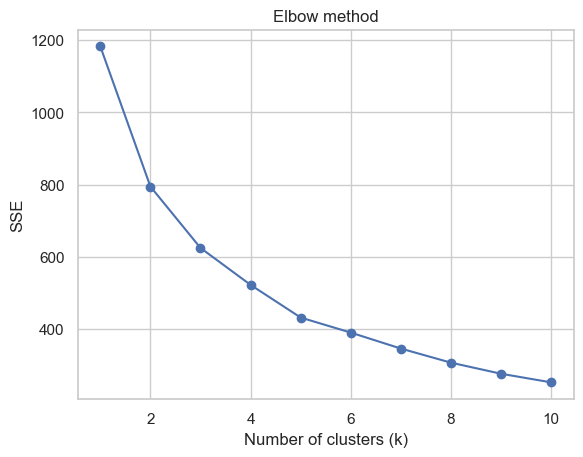

In [69]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_pivot)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()


At ```k=5``` the curve takes on a more linear descent, so will choose this value for our optimal cluster number.

In [70]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=1)
cluster_labels = kmeans.fit_predict(df_pivot)

# adds the cluster labels back to the pivot DataFrame
df_pivot['cluster'] = cluster_labels


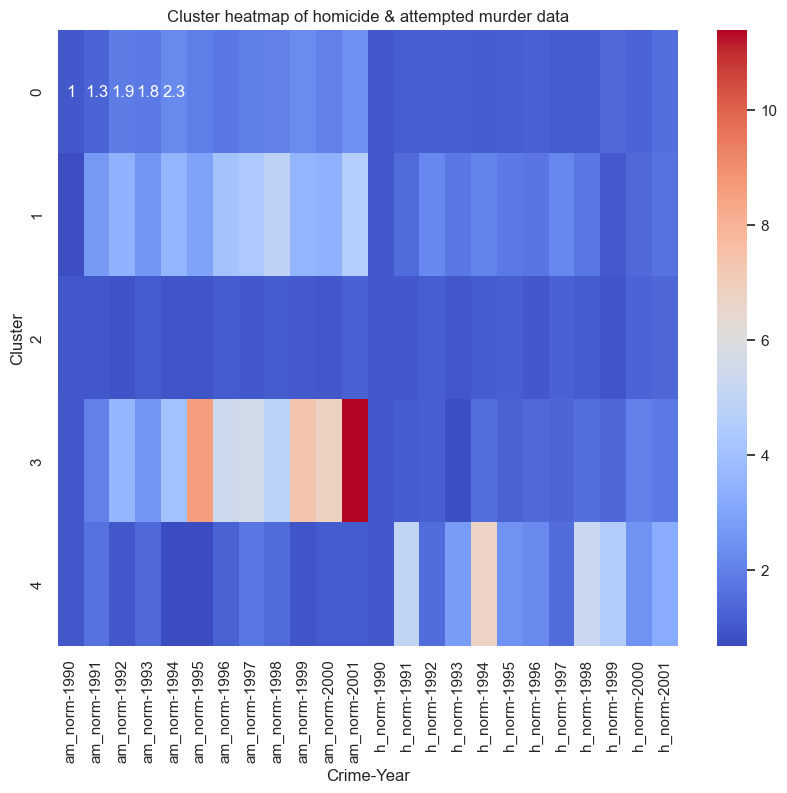

In [71]:
cluster_summary = df_pivot.groupby('cluster').mean()

# heatmap of cluster means
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm')
plt.title('Cluster heatmap of homicide & attempted murder data')
plt.xlabel('Crime-Year')
plt.ylabel('Cluster')
plt.show()


Clusters ```0``` and ```2``` are similar across 'features' (crimes during a given year).

We can take a look at which Force has been assigned to which cluster with the following code.

In [72]:
for i in range(k):
  print(f'Cluster {i} contains {len(df_pivot[df_pivot.cluster==i])}  police \'forces\'.')

Cluster 0 contains 15  police 'forces'.
Cluster 1 contains 4  police 'forces'.
Cluster 2 contains 22  police 'forces'.
Cluster 3 contains 1  police 'forces'.
Cluster 4 contains 2  police 'forces'.


We will look at these from smallest cluster to largest.

We will add the cluster number to the dataframe ```m_df``` as well.

In [73]:
for i in set(m_df['Force']):
  # Adds cluster number to the original (pre-pivot) dataframe
  m_df.loc[m_df.Force==i,'cluster'] = int(df_pivot.loc[i,'cluster'].item())
m_df.head()

,Force,Year,Homicide,Attempted murder,h_norm,am_norm,h_pc,am_pc,cluster
2,Avon and Somerset,1990,10.0,19.0,1.0,1.0,NaN,NaN,2.0
3,Bedfordshire,1990,6.0,10.0,1.0,1.0,-40.000000,-47.368421,2.0
4,Cambridgeshire,1990,6.0,8.0,1.0,1.0,0.000000,-20.000000,0.0
5,Cheshire,1990,6.0,2.0,1.0,1.0,0.000000,-75.000000,1.0
6,Cleveland,1990,10.0,5.0,1.0,1.0,66.666667,150.000000,0.0


Let's inspect the ```Forces``` in the clusters and their stats to see if anything jumps out.

In [104]:
# from pydoc import describe


def describe_force(df,cluster_no:int):
  '''
  Custom function that prints out a subset of .describe()
  for each Force in the given input cluster.
  Takes `df` and `cluster_no` as inputs.
  '''
  unique_forces = set(df[df.cluster==cluster_no].Force)
  df = df[df.Force.isin(unique_forces)]
  df = df[['Force','Year','h_norm','am_norm']]\
    .groupby('Force').describe().drop(
      [
        ('h_norm','count'),
        ('am_norm','count'),
        ('h_norm','25%'),
        ('am_norm','25%'),
        ('h_norm','75%'),
        ('am_norm','75%')
      ],axis=1)
  return df


describe_force(m_df,3)

h_norm                                      am_norm            \
                mean       std       min       50%  max      mean       std   
Force                                                                         
Merseyside  1.359649  0.340229  0.789474  1.342105  2.0  5.266667  2.959525   

                            
            min  50%   max  
Force                       
Merseyside  1.0  5.1  11.4


Merseyside is the only police district in cluster ```3```, indicating that it stands out among all others for a particular trend. We singled this jurisdiction out earlier because of its huge increase in attempted murders.

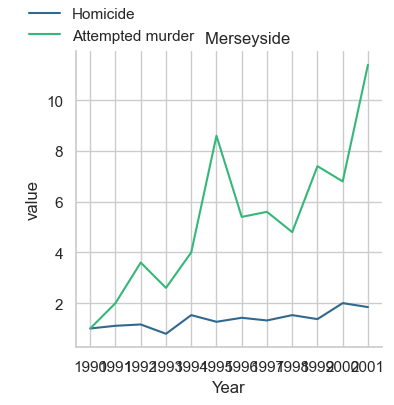

In [114]:
data = df_melt[df_melt.Force=='Merseyside']

g = sns.FacetGrid(data, col="Force", hue='crime', col_wrap=1, height=4, palette='viridis')
g.map(sns.lineplot, 'Year', 'value')


g.add_legend()
g._legend.set_bbox_to_anchor((0.4, .95))
g._legend.set_title('')
for t, l in zip(g._legend.texts, ["Homicide", "Attempted murder"]): 
    t.set_text(l)

g.set_titles('        {col_name}')

plt.show()

In [115]:
describe_force(m_df,4)

{'Lincolnshire', 'Gloucestershire'}
______________________________


h_norm                             am_norm            \
                     mean       std  min   50%  max      mean       std   
Force                                                                     
Gloucestershire  3.625000  2.090291  1.0  3.25  7.5  1.638889  0.702928   
Lincolnshire     2.833333  1.874874  1.0  2.25  6.0  0.697917  0.389705   

                                            
                      min       50%    max  
Force                                       
Gloucestershire  0.666667  1.666667  3.000  
Lincolnshire     0.250000  0.625000  1.625

In cluster 4 we have Gloucestershire and Lincolnshire, apparently undergoing their own separate trend. This seems to be something to do with the rise and fluctuation in homicides as both these of stand out for this reason.

In [116]:
data = df_melt[(df_melt.Force=='Gloucestershire') | (df_melt.Force=='Lincolnshire')]

g = sns.FacetGrid(data, col="Force", hue='crime', col_wrap=4, height=4, palette='viridis')
g.map(sns.lineplot, 'Year', 'value')


g.add_legend()
g._legend.set_bbox_to_anchor((0.32, 0.85))
g._legend.set_title('')
for t, l in zip(g._legend.texts, ["Homicide", "Attempted murder"]):  
    t.set_text(l)

g.set_axis_labels('', '1990 multiples')
g.set_titles('{col_name}')


plt.show()

KeyboardInterrupt: 

In [ ]:
print(set(m_df[m_df.cluster==1].Force))
print('_'*30)

# Prints describe for each unique Force
(
    m_df[m_df.Force.isin(set(m_df[m_df.cluster==1].Force))]
    [['Force','Year','h_norm','am_norm']].groupby('Force').describe()
    # drops some stats to keep output tidy
    .drop([('h_norm','count'),('am_norm','count'),('h_norm','25%'),
    ('am_norm','25%'),('h_norm','75%'),('am_norm','75%')],axis=1)
)

{'Gwent', 'North Wales', 'Cheshire', 'Warwickshire'}
______________________________


h_norm                                           am_norm  \
                  mean       std       min       50%       max      mean   
Force                                                                      
Cheshire      1.527778  0.677314  0.333333  1.666667  2.666667  3.916667   
Gwent         1.805556  0.869905  0.666667  1.666667  3.333333  3.750000   
North Wales   2.250000  0.818042  1.000000  2.000000  3.666667  2.833333   
Warwickshire  1.111111  0.656488  0.333333  1.000000  2.666667  3.083333   

                                                      
                   std       min       50%       max  
Force                                                 
Cheshire      1.689988  1.000000  3.750000  7.000000  
Gwent         1.577141  0.666667  4.333333  5.666667  
North Wales   1.114641  1.000000  3.000000  5.000000  
Warwickshire  2.193309  0.000000  3.000000  6.000000

Cluster ```1``` is the last **small** cluster, containing 4 police ```Force``` districts.

Unlike the previous cluster, these ```Forces``` show dramatic increases and fluctuations in ```Attempted murder``` rather than in ```Homicide```. While some show increases as severe as ```cluster 3``` (Merseyside), the KMeans algorithm has determined they belong to a different cluster and so my be undergoing different trends which would need to be teased out from the statistical data.

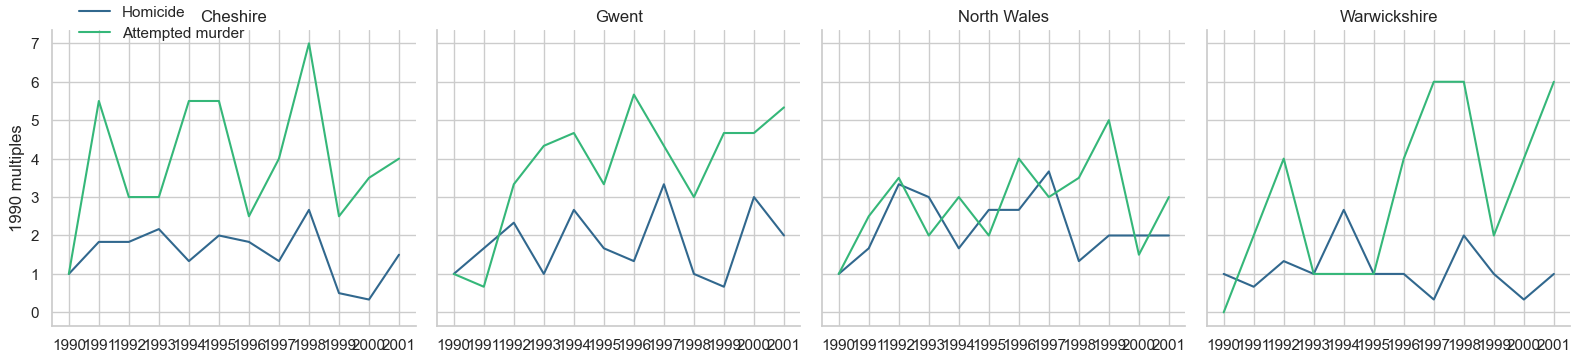

In [ ]:
data = df_melt[(df_melt.Force=='Cheshire') | (df_melt.Force=='Gwent') | (df_melt.Force=='North Wales') | (df_melt.Force=='Warwickshire')]

g = sns.FacetGrid(data, col="Force", hue='crime', col_wrap=4, height=4, palette='viridis')
g.map(sns.lineplot, 'Year', 'value')


g.add_legend()
g._legend.set_bbox_to_anchor((0.15, 0.85))
g._legend.set_title('')
for t, l in zip(g._legend.texts, ["Homicide", "Attempted murder"]):  
    t.set_text(l)

g.set_axis_labels('', '1990 multiples')
g.set_titles('{col_name}')


plt.show();


Finally, we look at the two larger clusters ```0``` and ```2```. We see that ```Total``` has been assigned to later, meaning ```cluster 2``` most resembles the average.

In [ ]:
print(set(m_df[m_df.cluster==0].Force))
print('_'*30)
# prints describe for each unique Force
(
    m_df[m_df.Force.isin(set(m_df[m_df.cluster==0].Force))]
    [['Force','Year','h_norm','am_norm']].groupby('Force').describe()
    # drops some stats to keep output tidy
    .drop([('h_norm','count'),('am_norm','count'),('h_norm','25%'),
    ('am_norm','25%'),('h_norm','75%'),('am_norm','75%')],axis=1)
)

{'West Midlands', 'West Mercia', 'South Yorkshire', 'Cleveland', 'Hertfordshire', 'Northamptonshire', 'Leicestershire', 'South Wales', 'Hampshire', 'Cambridgeshire', 'Northumbria', 'Greater Manchester', 'Wiltshire', 'Thames Valley', 'Derbyshire'}
______________________________


h_norm                                          \
                        mean       std       min       50%       max   
Force                                                                  
Cambridgeshire      0.986111  0.533988  0.333333  1.000000  2.166667   
Cleveland           0.866667  0.218812  0.500000  0.850000  1.200000   
Derbyshire          2.145833  0.828871  1.000000  2.125000  4.250000   
Greater Manchester  1.854167  0.548961  1.000000  1.803571  3.071429   
Hampshire           1.545455  0.723129  0.909091  1.227273  2.909091   
Hertfordshire       1.216667  0.542441  0.400000  1.000000  2.200000   
Leicestershire      0.848485  0.191217  0.545455  0.818182  1.090909   
Northamptonshire    1.729167  0.634772  1.000000  1.500000  3.000000   
Northumbria         0.848765  0.200671  0.518519  0.888889  1.148148   
South Wales         0.912698  0.154415  0.619048  0.880952  1.142857   
South Yorkshire     0.841270  0.219004  0.476190  0.880952  1.238095   
Thames Valley       1.138889  0.163265  0.888889  1.083333  1.333333   
West Mercia         1.058333  0.271221  0.600000  1.100000  1.500000   
West Midlands       1.297297  0.195575  1.000000  1.351351  1.513514   
Wiltshire           0.537879  0.246564  0.181818  0.500000  1.000000   

                     am_norm                                          
                        mean       std       min       50%       max  
Force                                                                 
Cambridgeshire      1.708333  0.577350  0.875000  1.937500  2.750000  
Cleveland           1.683333  0.542441  0.800000  1.800000  2.400000  
Derbyshire          2.291667  1.096655  1.000000  2.250000  4.000000  
Greater Manchester  1.747396  0.908399  0.656250  1.531250  3.437500  
Hampshire           1.578125  0.425672  1.000000  1.531250  2.312500  
Hertfordshire       1.416667  0.621582  0.666667  1.416667  2.833333  
Leicestershire      1.531250  0.759644  0.250000  1.437500  3.125000  
Northamptonshire    1.770833  0.548327  1.000000  1.750000  2.750000  
Northumbria         2.541667  1.078076  1.000000  2.250000  4.666667  
South Wales         1.861111  0.774705  0.666667  1.750000  3.166667  
South Yorkshire     1.509259  0.430223  0.888889  1.555556  2.444444  
Thames Valley       2.129630  0.710406  1.000000  2.166667  3.222222  
West Mercia         2.516667  0.981495  1.000000  2.400000  4.400000  
West Midlands       1.720000  0.439835  1.000000  1.740000  2.280000  
Wiltshire           2.416667  1.258306  1.000000  2.500000  4.500000

In [ ]:
print(set(m_df[m_df.cluster==2].Force))
print('_'*30)
# prints describe for each unique Force
(
    m_df[m_df.Force.isin(set(m_df[m_df.cluster==2].Force))]
    [['Force','Year','h_norm','am_norm']].groupby('Force').describe()
    # drops some stats to keep output tidy
    .drop([('h_norm','count'),('am_norm','count'),('h_norm','25%'),
    ('am_norm','25%'),('h_norm','75%'),('am_norm','75%')],axis=1)
)

{'Metropolitan Police', 'Essex', 'Cumbria', 'Total', 'Avon and Somerset', 'Sussex', 'Lancashire', 'Durham', 'Dyfed-Powys', 'London, City of', 'Nottinghamshire', 'Dorset', 'Surrey', 'Humberside', 'Bedfordshire', 'Norfolk', 'Devon and Cornwall', 'Suffolk', 'West Yorkshire', 'Staffordshire', 'North Yorkshire', 'Kent'}
______________________________


h_norm                                          \
                         mean       std       min       50%       max   
Force                                                                   
Avon and Somerset    1.675000  0.511904  1.000000  1.500000  2.500000   
Bedfordshire         1.430556  0.621412  0.666667  1.333333  2.833333   
Cumbria              1.000000  0.443129  0.200000  0.900000  1.800000   
Devon and Cornwall   1.451389  0.385105  0.666667  1.458333  1.916667   
Dorset               1.300000  0.684902  0.200000  1.100000  2.400000   
Durham               1.277778  0.483742  0.666667  1.166667  2.166667   
Dyfed-Powys          0.500000  0.229673  0.222222  0.444444  1.000000   
Essex                1.303030  0.405324  0.545455  1.272727  2.181818   
Humberside           1.314815  0.489699  0.444444  1.222222  2.000000   
Kent                 1.388889  0.904844  0.722222  1.111111  4.111111   
Lancashire           1.259804  0.295141  0.588235  1.235294  1.705882   
London, City of      0.583333  0.996205  0.000000  0.000000  3.000000   
Metropolitan Police  0.948370  0.088926  0.782609  0.951087  1.097826   
Norfolk              0.736111  0.286112  0.250000  0.791667  1.166667   
North Yorkshire      1.150000  0.372949  0.600000  1.100000  1.800000   
Nottinghamshire      1.064103  0.363524  0.538462  1.038462  2.076923   
Staffordshire        0.969697  0.338675  0.363636  1.090909  1.363636   
Suffolk              1.013889  0.566124  0.333333  0.916667  2.166667   
Surrey               1.069444  0.519607  0.333333  1.000000  2.000000   
Sussex               0.947368  0.258816  0.368421  0.973684  1.368421   
Total                1.108246  0.103159  1.000000  1.094170  1.331839   
West Yorkshire       0.817829  0.148359  0.581395  0.802326  1.000000   

                      am_norm                                          
                         mean       std       min       50%       max  
Force                                                                  
Avon and Somerset    0.964912  0.385021  0.473684  1.000000  1.736842  
Bedfordshire         0.566667  0.249848  0.200000  0.600000  1.000000  
Cumbria              1.111111  0.891411  0.333333  1.000000  3.333333  
Devon and Cornwall   1.121795  0.410275  0.461538  1.192308  2.076923  
Dorset               1.009259  0.371421  0.555556  1.000000  1.555556  
Durham               1.050000  0.444154  0.200000  1.000000  1.600000  
Dyfed-Powys          0.875000  0.541812  0.166667  0.916667  2.000000  
Essex                0.802632  0.271286  0.210526  0.815789  1.105263  
Humberside           1.104167  0.405338  0.500000  1.000000  2.000000  
Kent                 0.983333  0.312856  0.600000  0.900000  1.600000  
Lancashire           1.243056  0.376819  0.583333  1.166667  1.750000  
London, City of      0.583333  0.668558  0.000000  0.500000  2.000000  
Metropolitan Police  1.269113  0.171561  1.000000  1.233945  1.633028  
Norfolk              1.020833  0.319060  0.625000  0.937500  1.625000  
North Yorkshire      1.361111  0.642884  0.666667  1.333333  2.333333  
Nottinghamshire      0.659722  0.269348  0.333333  0.625000  1.166667  
Staffordshire        0.858333  0.339675  0.200000  0.950000  1.300000  
Suffolk              1.074074  0.252188  0.555556  1.111111  1.444444  
Surrey               0.907407  0.404335  0.333333  0.888889  1.666667  
Sussex               0.857143  0.323765  0.428571  0.892857  1.571429  
Total                1.376225  0.203437  1.000000  1.379202  1.798319  
West Yorkshire       1.369792  0.558037  0.937500  1.218750  2.937500

It's not clear on the surface what the difference is in these two clusters, but the algorithm has identified one.


## Next steps

1) Investigation of the statistical data for each cluster is needed, to see what the clustering algorithm has noticed. It may be useful to graph the means and standard deviations of each one.  (To be done in a way that preserves the time series nature of the data.)

2) It would be good to graph the clusters onto a map to see if they align with geographical regions, or are correlation with, e.g., population/population density.

3) For the future, it would clearly be beneficial to working ourselves up to including all the crimes that are stored in the original dataset, then the `KMeans` clustering algorithm will really be able to pick out trends in certain regions where there is no realistic way to do so with the human eye.

4) From the same Govt source is the file `rec-crime-pfa-2003-2015.ods`, which contains the same crime data but for the next 12 years. This should be appended to the current data and all analysis updated to reflect its presence.  (Have this hypothesis for free: that dataset will most likely contain scarier trends.)